# Data Preprocessing

## Importing the libraries

In [1]:

import pandas as pd
from google.colab import drive
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

In [3]:
data=pd.read_csv('insurance_claims.csv')

In [4]:
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [5]:
print(data.columns)

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')


## Handling unnecessary features

In [6]:
#delete unnecessary features
column_delete = ['_c39', 'policy_number', 'policy_bind_date', 'policy_csl', 'incident_date', 'incident_location',"insured_zip", "insured_hobbies", 'incident_city', 'auto_make', 'auto_model', 'auto_year']
data = data.drop(columns=column_delete)

In [7]:
data['fraud_reported'].value_counts()

,count
fraud_reported,
N,753
Y,247


## Handling Duplicates

In [8]:
#handling dulicates
if data.duplicated().any():
    print(data.duplicated().sum(),"has duplicate data.")
else:
    print("no duplicate.")

no duplicate.


## Handling Missing data


In [9]:
data.isnull().sum()

,0
months_as_customer,0
age,0
policy_state,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_sex,0
insured_education_level,0
insured_occupation,0
insured_relationship,0


In [10]:
# Convert categorical variable 'fraud_reported' to binary (Yes -> 1, No -> 0)
data['fraud_reported'] = data['fraud_reported'].map({'Y': 1, 'N': 0})

# Clustering Method



K-Means Silhouette Score: 0.5367069528807497
Agglomerative Clustering Silhouette Score: 0.5480981268479672
DBSCAN Silhouette Score: 0.43039951777662266


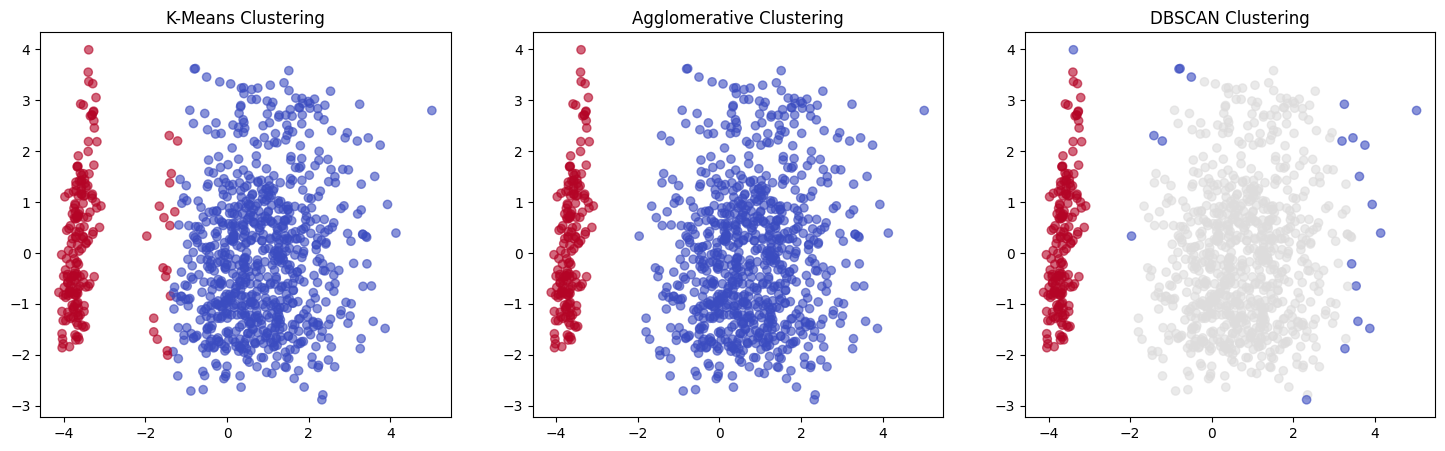

K-Means ARI: -0.06688233630639914
Agglomerative Clustering ARI: -0.06808683361451137
DBSCAN ARI: -0.06345568878978967


In [11]:
# Separating features and target
X = data.drop(columns=['fraud_reported'])  # Features
y = data['fraud_reported']  # Target

# Identify categorical and numerical columns
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Encoding categorical variables
column_transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('scaler', StandardScaler(), numerical_features)
], remainder='passthrough')

X_transformed = column_transformer.fit_transform(X)

# Apply Principal Component Analysis (PCA) for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_transformed)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2)
agglo_labels = agglo.fit_predict(X_pca)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca)

# Evaluate Clustering Performance
print("K-Means Silhouette Score:", silhouette_score(X_pca, kmeans_labels))
print("Agglomerative Clustering Silhouette Score:", silhouette_score(X_pca, agglo_labels))
print("DBSCAN Silhouette Score:", silhouette_score(X_pca, dbscan_labels))

# Visualize Clustering Results
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='coolwarm', alpha=0.6)
ax[0].set_title('K-Means Clustering')
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=agglo_labels, cmap='coolwarm', alpha=0.6)
ax[1].set_title('Agglomerative Clustering')
ax[2].scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='coolwarm', alpha=0.6)
ax[2].set_title('DBSCAN Clustering')
plt.show()

# Compare Clustering Labels with Actual Fraud Labels
print("K-Means ARI:", adjusted_rand_score(y, kmeans_labels))
print("Agglomerative Clustering ARI:", adjusted_rand_score(y, agglo_labels))
print("DBSCAN ARI:", adjusted_rand_score(y, dbscan_labels))

## Interpretation:
**Silhouette Score:**
- Agglomerative Clustering (0.5481) performs slightly better than K-Means (0.5367).

- DBSCAN (0.4304) has the worst silhouette score, meaning its clusters are less well-defined.

**Adjusted Rand Index (ARI):**
- Since all ARI values are negative, it means that the clusters do not align with the actual fraud labels at all—worse than random guessing. This suggests that clustering might not be the best approach for fraud detection in this dataset.

# Logistic Regression, Random forest, XGBoost Classifier

Logistic Regression:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       220
           1       0.55      0.39      0.46        80

    accuracy                           0.75       300
   macro avg       0.68      0.64      0.65       300
weighted avg       0.73      0.75      0.74       300

Random Forest:
               precision    recall  f1-score   support

           0       0.74      0.91      0.82       220
           1       0.33      0.12      0.18        80

    accuracy                           0.70       300
   macro avg       0.54      0.52      0.50       300
weighted avg       0.63      0.70      0.65       300

XGBoost:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       220
           1       0.55      0.40      0.46        80

    accuracy                           0.75       300
   macro avg       0.68      0.64      0.65       300
weighted avg       0.74   

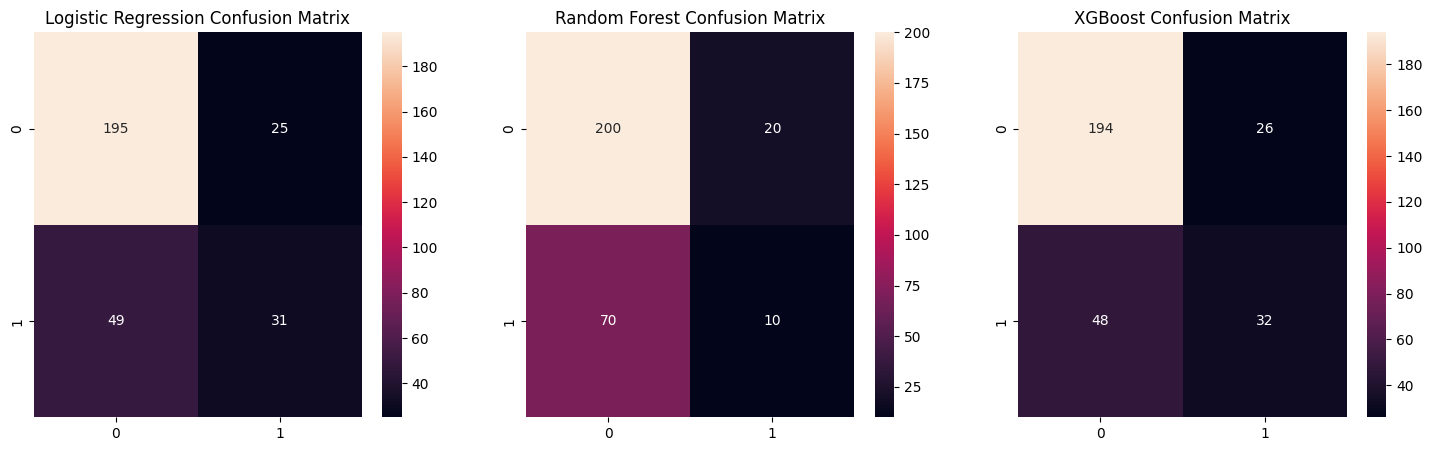

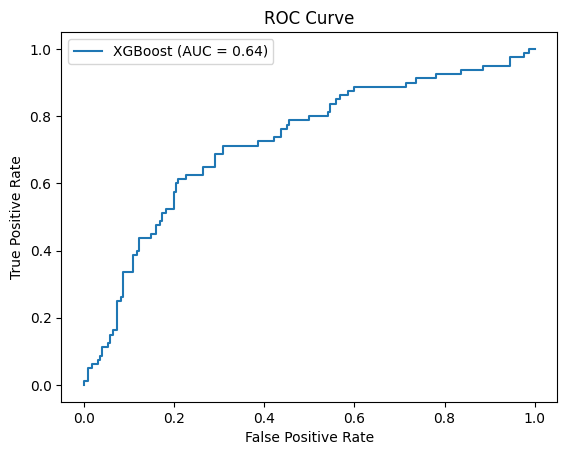

In [12]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# XGBoost Classifier
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
print("Logistic Regression:\n", classification_report(y_test, y_pred_logreg))
print("Random Forest:\n", classification_report(y_test, y_pred_rf))
print("XGBoost:\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrices
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sn.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', ax=ax[0])
ax[0].set_title('Logistic Regression Confusion Matrix')
sn.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', ax=ax[1])
ax[1].set_title('Random Forest Confusion Matrix')
sn.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', ax=ax[2])
ax[2].set_title('XGBoost Confusion Matrix')
plt.show()

# ROC Curve for XGBoost
fpr, tpr, _ = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='XGBoost (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_xgb)))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


## Interpretation

**Precision:**

- Logistic Regression and XGBoost: Precision for fraud (1) is 0.55, indicating that when the model predicts fraud, it is correct 55% of the time.

- Random Forest: Precision for fraud is much lower at 0.33.

**Recall:**

- Logistic Regression and XGBoost: Recall for fraud (1) is 0.39 and 0.40, respectively, meaning they only detect about 39-40% of actual fraud cases.

- Random Forest: Performs much worse with a recall of 0.12 for fraud.

**F1-Score:**

- Logistic Regression and XGBoost: F1-score for fraud (1) is 0.46, indicating *a balanced but moderate performance.*

- Random Forest: F1-score is low at 0.18, indicating poor detection of fraud.

4. Macro and Weighted Averages:

- Logistic Regression and XGBoost: Show balanced macro and weighted averages.

- Random Forest: Lower averages, especially for fraud detection.

# Improving The Model

Stacking Model Performance:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       216
           1       0.89      0.84      0.86       236

    accuracy                           0.86       452
   macro avg       0.86      0.86      0.86       452
weighted avg       0.86      0.86      0.86       452



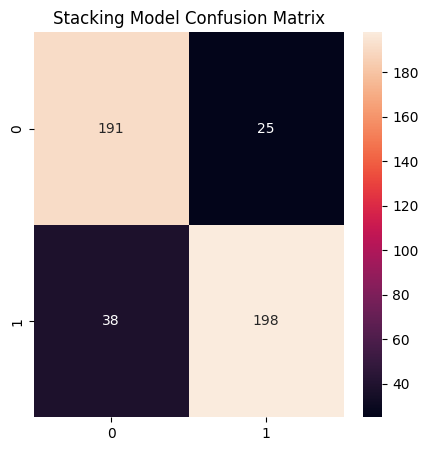

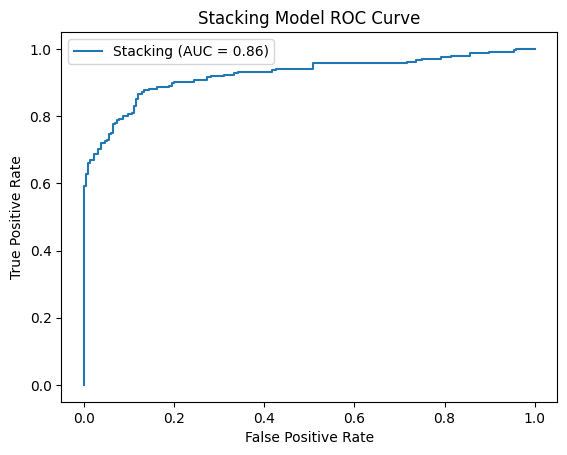

In [13]:
# Improved Fraud Detection in Insurance Claims

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sn
import matplotlib.pyplot as plt

# Addressing Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_transformed, y)

# Splitting Resampled Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Logistic Regression with Class Weights
logreg = LogisticRegression(class_weight='balanced', random_state=42)

# XGBoost with Hyperparameter Tuning
xgb = XGBClassifier(scale_pos_weight=len(y_resampled[y_resampled == 0]) / len(y_resampled[y_resampled == 1]), random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
}
grid_search_xgb = GridSearchCV(xgb, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Best XGBoost Model
xgb_best = grid_search_xgb.best_estimator_

# Stacking Logistic Regression and XGBoost
stacking = StackingClassifier(estimators=[('lr', logreg), ('xgb', xgb_best)], final_estimator=LogisticRegression())
stacking.fit(X_train, y_train)
y_pred_stacking = stacking.predict(X_test)

# Evaluation
print("Stacking Model Performance:")
print(classification_report(y_test, y_pred_stacking))

# Confusion Matrix for Stacking
plt.figure(figsize=(5, 5))
sn.heatmap(confusion_matrix(y_test, y_pred_stacking), annot=True, fmt='d')
plt.title('Stacking Model Confusion Matrix')
plt.show()

# ROC Curve for Stacking Model
fpr, tpr, _ = roc_curve(y_test, stacking.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='Stacking (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_stacking)))
plt.title('Stacking Model ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


## Interpretation:
**1. Overall Accuracy:**
The stacking model achieved 86% accuracy on the test data.

This is a significant improvement compared to the previous models (75%).

**2. Class-wise Performance:**

*Class 0 (Non-Fraudulent Claims):*

Precision: 0.83

→ Out of all claims predicted as non-fraudulent, 83% were correctly classified.

Recall: 0.88

→ Out of all actual non-fraudulent claims, 88% were correctly identified.

F1-Score: 0.86

→ Balances precision and recall, indicating good performance for this class.

*Class 1 (Fraudulent Claims):*

Precision: 0.89

→ Out of all claims predicted as fraudulent, 89% were correctly classified.

Recall: 0.84

→ Out of all actual fraudulent claims, 84% were correctly identified.

F1-Score: 0.86

→ Indicates a good balance between precision and recall for fraud cases.

3. Macro and Weighted Averages:
Macro Average:

Precision, Recall, and F1-Score are all 0.86, showing balanced performance across both classes.

**Weighted Average:**

Also 0.86, indicating that the model is performing well without favoring the majority class.


# Conclusion:
The stacking model significantly improved recall and precision for fraudulent cases compared to the previous models.

The combination of SMOTE balancing, cost-sensitive learning, and model stacking contributed to this improvement.